In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np

train_data=np.load('/content/drive/MyDrive/Identify patches in concrete project/train_data_unscaled.npy')
train_target=np.load('/content/drive/MyDrive/Identify patches in concrete project/train_target.npy')
test_data=np.load('/content/drive/MyDrive/Identify patches in concrete project/test_data_unscaled.npy')
test_target=np.load('/content/drive/MyDrive/Identify patches in concrete project/test_target.npy')
print(train_data.shape)
print(train_target.shape)
print(test_data.shape)
print(test_target.shape)

(1800, 224, 224, 3)
(1800, 2)
(200, 224, 224, 3)
(200, 2)


In [5]:
train_data_scaled=train_data/255
test_data_scaled=test_data/255

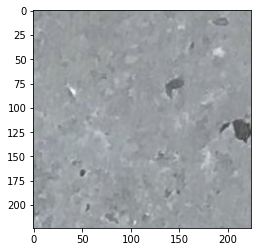

In [6]:
import matplotlib.pyplot as plt

plt.imshow(test_data[100])

In [7]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

baseModel = MobileNetV2(weights="imagenet", include_top=False,input_tensor=Input(shape=(224,224, 3)))

headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)


model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    
    layer.trainable = False

model.compile(loss="categorical_crossentropy", optimizer='adam',metrics=["accuracy"])
model.summary()

9412608/9406464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________

In [8]:
from keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,horizontal_flip=True,fill_mode="nearest")

In [9]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('/content/drive/MyDrive/Identify patches in concrete project/weights/weights-{epoch:03d}.h5',monitor='val_loss',save_best_only=True,mode='auto')

In [10]:
bs=32

history=model.fit(aug.flow(train_data_scaled,train_target,batch_size=bs),validation_data=(test_data_scaled,test_target),epochs=300,callbacks=[checkpoint])

Epoch 1/300
57/57 [==============================] - 53s 333ms/step - loss: 0.4440 - accuracy: 0.8185 - val_loss: 0.0344 - val_accuracy: 0.9950
Epoch 2/300
57/57 [==============================] - 18s 313ms/step - loss: 0.0886 - accuracy: 0.9633 - val_loss: 0.0186 - val_accuracy: 0.9950
Epoch 3/300
57/57 [==============================] - 18s 315ms/step - loss: 0.0681 - accuracy: 0.9730 - val_loss: 0.0140 - val_accuracy: 0.9950
Epoch 4/300
57/57 [==============================] - 18s 312ms/step - loss: 0.0523 - accuracy: 0.9788 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 5/300
57/57 [==============================] - 18s 312ms/step - loss: 0.0905 - accuracy: 0.9686 - val_loss: 0.0208 - val_accuracy: 0.9950
Epoch 6/300
57/57 [==============================] - 18s 309ms/step - loss: 0.0422 - accuracy: 0.9843 - val_loss: 0.0148 - val_accuracy: 0.9950
Epoch 7/300
57/57 [==============================] - 18s 314ms/step - loss: 0.0501 - accuracy: 0.9848 - val_loss: 0.0132 - val_accuracy:

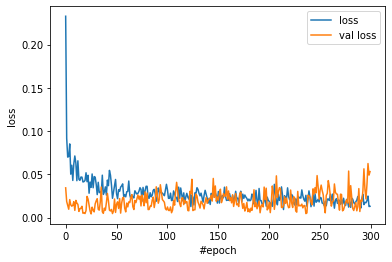

In [11]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.xlabel('#epoch')
plt.ylabel('loss')
plt.show()


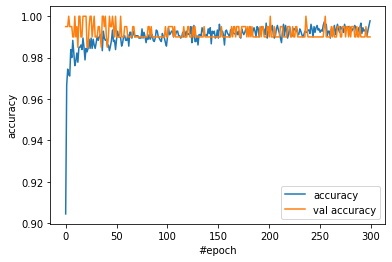

In [12]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.xlabel('#epoch')
plt.ylabel('accuracy')
plt.show()
